In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
# pulling the data from the csv file 
df = pd.read_csv("../../Output/2_zomato_csv/Zomato_Restaurants_All_Consolidated-Types.csv")
df

,Unnamed: 0,Name,Aggregate Rating,Type,Price,Latitude,Longitude,Sensor ID,Sensor
0,0,Soul Cafe,3.0,Cafe,3,-37.813075,144.965281,1,Bourke Street Mall (North)
1,1,Song Tea,3.5,Beverages,1,-37.813810,144.965600,1,Bourke Street Mall (North)
2,2,Sensory Lab - Bourke Street,3.4,Cafe,2,-37.813398,144.964499,1,Bourke Street Mall (North)
3,3,SamSam,4.0,Restaurant,3,-37.812885,144.965210,1,Bourke Street Mall (North)
4,4,Boost Juice,3.7,Beverages,1,-37.813798,144.965849,1,Bourke Street Mall (North)
...,...,...,...,...,...,...,...,...,...
100,115,The Borek Bakehouse,4.4,Bakery,1,-37.807711,144.960005,26,QV Market-Elizabeth St (West)
101,116,Chickcha,3.7,Cafe,2,-37.809073,144.961767,26,QV Market-Elizabeth St (West)
102,117,Damiao Panda Fan 大妙火锅 · 川菜,3.0,Restaurant,3,-37.809614,144.961199,26,QV Market-Elizabeth St (West)
103,118,Mansae Korean BBQ & Bar,4.5,Restaurant,4,-37.809563,144.959607,26,QV Market-Elizabeth St (West)


In [3]:
df.count()

Unnamed: 0          105
Name                105
Aggregate Rating    105
Type                105
Price               105
Latitude            105
Longitude           105
Sensor ID           105
Sensor              105
dtype: int64

In [4]:
df.dtypes

Unnamed: 0            int64
Name                 object
Aggregate Rating    float64
Type                 object
Price                 int64
Latitude            float64
Longitude           float64
Sensor ID             int64
Sensor               object
dtype: object

In [5]:
# grouping by the date and applying aggregates
grouped = df.groupby(["Sensor"])
averages_df = grouped[['Aggregate Rating','Price']].mean()
averages_df.head()

,Aggregate Rating,Price
Sensor,,
Bourke Street Mall (North),3.512500,2.000000
Flinders St-Spark La,3.722222,2.638889
QV Market-Elizabeth St (West),3.767568,2.351351


In [6]:
# add empty column to dataframe to store pedestrian count data
averages_df["Yearly Average Ped Count"] = ""
averages_df

,Aggregate Rating,Price,Yearly Average Ped Count
Sensor,,,
Bourke Street Mall (North),3.512500,2.000000,
Flinders St-Spark La,3.722222,2.638889,
QV Market-Elizabeth St (West),3.767568,2.351351,


In [8]:
# Import pedestrian count data from 3 sensors produced from previous notebook
location_averages_df = pd.read_csv("../../Output/1_pedestrian_csv/sensors2019_chosen3_dailyaverage.csv")
location_averages_df

,Bourke Street Mall (North),Flinders St-Spark La,QV Market-Elizabeth St (West)
0,1119.375000,117.791667,363.500000
1,1504.125000,185.708333,586.250000
2,1458.750000,154.833333,551.000000
3,1283.727273,138.818182,512.181818
4,1384.791667,180.416667,588.875000
...,...,...,...
358,1438.166667,138.791667,577.958333
359,1133.666667,133.625000,383.375000
360,1304.083333,146.083333,583.583333
361,1299.125000,105.333333,633.041667


In [9]:
# get average and save as pandas series
each_average = location_averages_df.mean()
each_average

Bourke Street Mall (North)       1356.286408
Flinders St-Spark La              146.995674
QV Market-Elizabeth St (West)     606.944350
dtype: float64

In [10]:
# assign pandas series average pedestrian count data to aggregate rating & price dataframe
averages_df["Yearly Average Ped Count"]=each_average
averages_df

,Aggregate Rating,Price,Yearly Average Ped Count
Sensor,,,
Bourke Street Mall (North),3.512500,2.000000,1356.286408
Flinders St-Spark La,3.722222,2.638889,146.995674
QV Market-Elizabeth St (West),3.767568,2.351351,606.944350


In [11]:
# reset index 
averages_df.reset_index(inplace=True)
averages_df

,Sensor,Aggregate Rating,Price,Yearly Average Ped Count
0,Bourke Street Mall (North),3.512500,2.000000,1356.286408
1,Flinders St-Spark La,3.722222,2.638889,146.995674
2,QV Market-Elizabeth St (West),3.767568,2.351351,606.944350


In [12]:
# export dataframe as CSV file
averages_df.to_csv("../../Output/1_pedestrian_csv/sensors3_averaged_rating_price_pedestrians.csv")

In [13]:
# confirm datatype of all columns and that relevant columns are numerical 
averages_df.dtypes

Sensor                       object
Aggregate Rating            float64
Price                       float64
Yearly Average Ped Count    float64
dtype: object

In [14]:
# set variables for bar chart analyses
locations = averages_df["Sensor"]
price = averages_df["Price"]
footfall = averages_df["Yearly Average Ped Count"]
rating = averages_df["Aggregate Rating"]

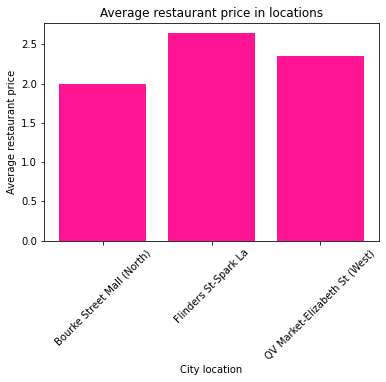

In [15]:
# Create a bar chart based upon the above data
plt.bar(locations, price, color="deeppink", align="center")
plt.title("Average restaurant price in locations")
plt.xlabel("City location")
plt.ylabel("Average restaurant price")
plt.xticks(locations, rotation=45)
# plt.figure(figsize=(10,10))
# plt.tight_layout()
plt.savefig("../../Output/barchart_avpricein3locations.png")
plt.show()

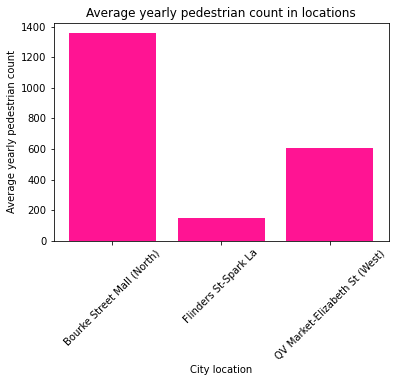

In [16]:
# Create a bar chart based upon the above data
plt.bar(locations, footfall, color="deeppink", align="center")
plt.title("Average yearly pedestrian count in locations")
plt.xlabel("City location")
plt.ylabel("Average yearly pedestrian count")
plt.xticks(locations, rotation=45)
# plt.figure(figsize=(10,10))
# plt.tight_layout()
plt.savefig("../../Output/barchart_yearlyavpedcountin3locations.png")
plt.show()

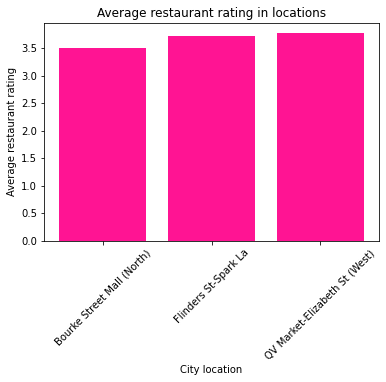

In [17]:
# Create a bar chart based upon the above data
plt.bar(locations, rating, color="deeppink", align="center")
plt.title("Average restaurant rating in locations")
plt.xlabel("City location")
plt.ylabel("Average restaurant rating")
plt.xticks(locations, rotation=45)
# plt.figure(figsize=(10,10))
# plt.tight_layout()
plt.savefig("../../Output/barchart_avratingin3locations.png")
plt.show()

In [18]:
ratingprice_df = averages_df.loc[:,["Sensor","Aggregate Rating", "Price"]]
ratingprice_df                            

,Sensor,Aggregate Rating,Price
0,Bourke Street Mall (North),3.512500,2.000000
1,Flinders St-Spark La,3.722222,2.638889
2,QV Market-Elizabeth St (West),3.767568,2.351351


In [19]:
ratingprice_df = ratingprice_df.set_index("Sensor")
ratingprice_df

,Aggregate Rating,Price
Sensor,,
Bourke Street Mall (North),3.512500,2.000000
Flinders St-Spark La,3.722222,2.638889
QV Market-Elizabeth St (West),3.767568,2.351351


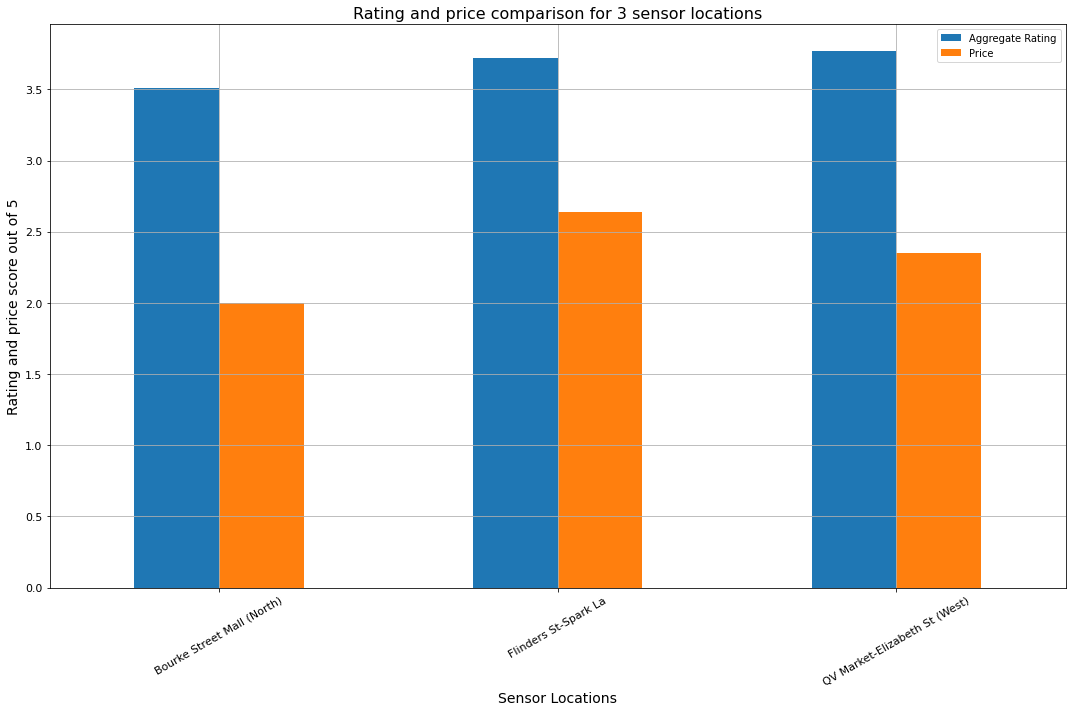

In [20]:
# Create a bar chart based off of the group series from before
count_chart = ratingprice_df.plot(kind='bar',rot=30,fontsize=11, figsize=(15,10), grid=True)
# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Sensor Locations", fontsize=14)
count_chart.set_ylabel("Rating and price score out of 5",fontsize=14)
count_chart.set_title("Rating and price comparison for 3 sensor locations", fontsize=16)
plt.tight_layout()
count_chart.get_figure()
count_chart.figure.savefig("../../Output/bar_compareratingprice_3locations.png")
plt.show()